In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
plt.style.use('ggplot')

In [2]:
df = pd.read_csv('data/df_cleaned_removed_outliers.csv', encoding='latin-1')
columns_df = pd.read_csv('data/column_details.csv')

In [3]:
df.drop(['Unnamed: 0','municipality'], axis=1, inplace=True)
df.head()

,hhid,barangay,hcn,hcn_nrdb,geopoint_hh_long,geopoint_hh_lat,hh_totmem,hh_totmem_male,hh_totmem_female,hh_fototmem,...,hhage,hheduca2,hheduca3,hheduca4,hheduca5,hheduca67,hhntagri,urb_loc,Unnamed: 237,emp_ratio
0,3490300201000002,Aduas Centro (Aduas),2.0,2.0,120.963972,15.495107,4,2.0,2.0,0.0,...,32.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0
1,3490300201000003,Aduas Centro (Aduas),3.0,3.0,120.963789,15.495142,4,2.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0
2,3490300201000004,Aduas Centro (Aduas),4.0,4.0,120.964056,15.495096,5,3.0,2.0,0.0,...,63.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,4.0
3,3490300201000005,Aduas Centro (Aduas),5.0,5.0,120.964120,15.494900,7,4.0,3.0,0.0,...,103.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,2.5
4,3490300201000007,Aduas Centro (Aduas),7.0,7.0,120.963870,15.495140,5,3.0,2.0,0.0,...,38.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,4.0


In [4]:
def rep(row):
    if row == 'Santo NiÃ±o':
        return 'Santo Nino'
    else:
        return row
    
df['barangay'] = df['barangay'].apply(rep)

In [5]:
columns_df[columns_df['code']=='nsubp']

,excel column,code,name,note
179,GI,nsubp,number of members if subsistently poor,NaN


In [6]:
for column in df.columns:
    print(column)
    print('------------')

hhid
------------
barangay
------------
hcn
------------
hcn_nrdb
------------
geopoint_hh_long
------------
geopoint_hh_lat
------------
hh_totmem
------------
hh_totmem_male
------------
hh_totmem_female
------------
hh_fototmem
------------
hh_fototmem_male
------------
hh_fototmem_female
------------
hh_fowtotmem
------------
hh_fowtotmem_male
------------
hh_fowtotmem_female
------------
nmem04
------------
nmem04_male
------------
nmem04_female
------------
nmem05
------------
nmem05_male
------------
nmem05_female
------------
nmaln05
------------
nmaln05_male
------------
nmaln05_female
------------
ndeath04
------------
ndeath04_male
------------
ndeath04_female
------------
ndeath05
------------
ndeath05_male
------------
ndeath05_female
------------
nmem01
------------
nmem01_male
------------
nmem01_female
------------
ndeath01
------------
ndeath01_male
------------
ndeath01_female
------------
ndeathpreg
------------
ndeathpreg_male
------------
ndeathpreg_female
--------

In [7]:
df_per_barangay = df.groupby('barangay')[['hh_totmem', 'nmem01', 'ndeath01', 'nmem04', 'ndeath04', 'nmem05', 'nmaln05', 'ndeath05',
                                          'nsquat', 'nmsh', 'nntsws', 'nntstf', 'nmem5', 'nntkinder5', 'nmem611', 'nntelem611',
                                          'nmem1215', 'nnths1215', 'nmem612', 'nntelem612', 'nmem1316', 'nnths1316', 'nmem1617',
                                          'nnths1617', 'nmem1721', 'ntert1721', 'nmem10ab', 'nntliter10ab', 'npovp', 'nsubp', 'nfshort',
                                          'nlabfor', 'nunempl15ab', 'nvictcr', 'nmem014', 'nmem1564', 'nmem65ab'
                                         ]].sum()

In [8]:
for column in df_per_barangay.columns:
    print(column)
    print('------------')

hh_totmem
------------
nmem01
------------
ndeath01
------------
nmem04
------------
ndeath04
------------
nmem05
------------
nmaln05
------------
ndeath05
------------
nsquat
------------
nmsh
------------
nntsws
------------
nntstf
------------
nmem5
------------
nntkinder5
------------
nmem611
------------
nntelem611
------------
nmem1215
------------
nnths1215
------------
nmem612
------------
nntelem612
------------
nmem1316
------------
nnths1316
------------
nmem1617
------------
nnths1617
------------
nmem1721
------------
ntert1721
------------
nmem10ab
------------
nntliter10ab
------------
npovp
------------
nsubp
------------
nfshort
------------
nlabfor
------------
nunempl15ab
------------
nvictcr
------------
nmem014
------------
nmem1564
------------
nmem65ab
------------


In [9]:
def prop(part, whole):
    if whole == 0:
        return 0
    else:
        return part / whole * 100

In [10]:
df_per_barangay['ndeath01_prop'] = df_per_barangay.apply(lambda x: prop(x['ndeath01'], x['nmem01']),
                                                       axis=1)
df_per_barangay['nmaln05_prop'] = df_per_barangay.apply(lambda x: prop(x['nmaln05'], x['nmem05']),
                                                       axis=1)
df_per_barangay['ndeath05_prop'] = df_per_barangay.apply(lambda x: prop(x['ndeath05'], x['nmem05']),
                                                       axis=1)
df_per_barangay['nsquat_prop'] = df_per_barangay.apply(lambda x: prop(x['nsquat'], x['hh_totmem']),
                                                       axis=1)
df_per_barangay['nmsh_prop'] = df_per_barangay.apply(lambda x: prop(x['nmsh'], x['hh_totmem']),
                                                       axis=1)
df_per_barangay['nntsws_prop'] = df_per_barangay.apply(lambda x: prop(x['nntsws'], x['hh_totmem']),
                                                       axis=1)
df_per_barangay['nntstf_prop'] = df_per_barangay.apply(lambda x: prop(x['nntstf'], x['hh_totmem']),
                                                       axis=1)
df_per_barangay['nntkinder5_prop'] = df_per_barangay.apply(lambda x: prop(x['nntkinder5'], x['nmem5']),
                                                       axis=1)
df_per_barangay['nntelem611_prop'] = df_per_barangay.apply(lambda x: prop(x['nntelem611'], x['nmem611']),
                                                       axis=1)
df_per_barangay['nnths1215_prop'] = df_per_barangay.apply(lambda x: prop(x['nnths1215'], x['nmem1215']),
                                                       axis=1)
df_per_barangay['nntelem612_prop'] = df_per_barangay.apply(lambda x: prop(x['nntelem612'], x['nmem612']),
                                                       axis=1)
df_per_barangay['nnths1316_prop'] = df_per_barangay.apply(lambda x: prop(x['nnths1316'], x['nmem1316']),
                                                       axis=1)
df_per_barangay['nnths1617_prop'] = df_per_barangay.apply(lambda x: prop(x['nnths1617'], x['nmem1617']),
                                                       axis=1)
df_per_barangay['ntert1721_prop'] = df_per_barangay.apply(lambda x: prop(x['ntert1721'], x['nmem1721']),
                                                       axis=1)
df_per_barangay['nntliter10ab_prop'] = df_per_barangay.apply(lambda x: prop(x['nntliter10ab'], x['nmem10ab']),
                                                       axis=1)
df_per_barangay['npovp_prop'] = df_per_barangay.apply(lambda x: prop(x['npovp'], x['hh_totmem']),
                                                       axis=1)
df_per_barangay['nsubp_prop'] = df_per_barangay.apply(lambda x: prop(x['nsubp'], x['hh_totmem']),
                                                       axis=1)
df_per_barangay['nfshort_prop'] = df_per_barangay.apply(lambda x: prop(x['nfshort'], x['hh_totmem']),
                                                       axis=1)
df_per_barangay['nunempl15ab_prop'] = df_per_barangay.apply(lambda x: prop(x['nunempl15ab'], x['nlabfor']),
                                                       axis=1)
df_per_barangay['nvictcr_prop'] = df_per_barangay.apply(lambda x: prop(x['nvictcr'], x['hh_totmem']),
                                                       axis=1)

In [11]:
df_per_barangay['age_dep_prop'] = ((df_per_barangay['nmem014'] + df_per_barangay['nmem65ab']) / df_per_barangay['hh_totmem']) * 100
df_per_barangay['dep_prop'] = ((df_per_barangay['hh_totmem'] - (df_per_barangay['nlabfor'] - df_per_barangay['nunempl15ab'])) / df_per_barangay['hh_totmem']) * 100

In [12]:
for column in df_per_barangay.columns:
    print(column)
    print(df_per_barangay[column].unique())
    print('---------------------')

hh_totmem
[3878 4382 5160  641 4122 2951 5894 1709 5890 1697 5878 1545 4165  819
 4414 2061 2122 8266 3791 1478 7670 1330 1445 1672  100 1223 3610 6047
 1740 3265  923 4496  609 1105 1967 2852 1635 2472 4805 2146 1860 2118
 4330 3478 2664 2938 3231 2029  577  772 1618 4239  378  543 2931  264
 3781 2350 1871 2982 2400 1895 2265 1121 1003  600 1436 4205 3109 5004
 5326  894 1078  930 1214 1712 1596 1106 3349 3957 3439 2008 2834 3347
  824 1134  843]
---------------------
nmem01
[ 45.  76.  89.  12.  80.  57.  92.  20. 101.  29. 113. 110.  69.  36.
  32. 150.  28. 141.  37.   0.  18.  65.  90.  27.  52. 100.   4.  22.
  54.  39. 104.  31.  41.  56.   9.  13.  26.   3.   5.  48.  68.  33.
  34.  47.  10.  58.  86. 118.  11.  21.  24.  62.  46.  75.  40.  70.
  16.  15.]
---------------------
ndeath01
[0. 2. 3. 1.]
---------------------
nmem04
[297. 380. 496.  72. 420. 277. 530. 149. 511. 147. 592. 152. 495. 365.
 203. 173. 769. 392. 137. 660.  78. 166. 176.   1. 108. 344. 563. 146.
 286. 

[ 4.10005157  7.23413966  3.54651163  1.40405616  2.62008734  1.86377499
  0.88225314  1.40433002  1.06960951  4.83205657  7.55358966  1.61812298
  3.16926771  0.          2.2655188   3.2508491   1.50801131  1.95983547
  2.16301767  1.89445196  2.26857888  4.13533835  3.0449827   2.99043062
  1.          0.81766149  2.90858726  2.62940301  1.77641654  0.43336945
 11.8772242   1.08597285  3.10116929  0.82484231  0.7713885   0.3058104
  0.43704475  0.27958993  1.88172043  3.06893296  0.85450346  1.29384704
  0.52552553  4.62899932 11.20396162  0.98570724  1.21317158  0.38860104
  0.86526576  2.07596131  0.92081031  0.51177073  1.61332981  0.21276596
  1.2827365   3.82293763  2.5         1.58311346  1.50110375  0.44603033
  1.29611167  2.16666667  1.60167131  1.59334126  1.83338694  1.77857714
  2.96657905  0.11185682  1.39146568  1.1827957   1.97693575  5.54906542
 11.81713629  1.75438596  0.63291139  1.64228128  1.1119535   0.75603373
  2.53984064  0.49400141  9.82969824  1.09223301  1.

In [13]:
prop = [column for column in df_per_barangay.columns if 'prop' in column]
prop = prop

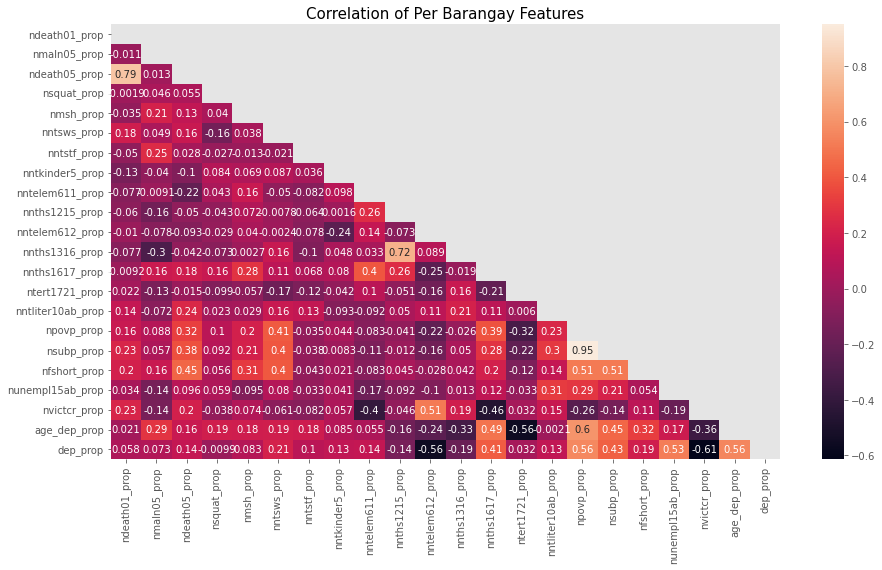

In [14]:
quant = df_per_barangay[prop]

corr = quant.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
fig, ax = plt.subplots(figsize=(15, 8))
ax = sns.heatmap(corr, mask=mask, annot=True)
ax.set_title("Correlation of Per Barangay Features", fontsize=15, y=1)
plt.show()

## Hypothesis Testing

In [15]:
columns = []
intercept = []
p_val = []
remarks = []
for column in prop:
    model_stats = smf.ols(formula=f'npovp_prop ~ {column}', data=df_per_barangay[prop]).fit()
    
    columns.append(column)
    intercept.append(model_stats.pvalues[0])
    p_val.append(model_stats.pvalues[1])
    
    if model_stats.pvalues[1] <= 0.05:
        remarks.append('include')
    else:
        remarks.append('reject')

p_val_check = pd.DataFrame({'columns':columns, 'intercept':intercept,
                           'p_val':p_val, 'remarks':remarks})

In [16]:
p_val_check

,columns,intercept,p_val,remarks
0,ndeath01_prop,6.028705e-38,1.366463e-01,reject
1,nmaln05_prop,9.608496e-34,4.129977e-01,reject
2,ndeath05_prop,5.051222e-36,2.049463e-03,include
3,nsquat_prop,3.851023e-31,3.484494e-01,reject
4,nmsh_prop,2.155897e-30,5.516715e-02,reject
5,nntsws_prop,3.475894e-39,6.056028e-05,include
6,nntstf_prop,1.691141e-39,7.472808e-01,reject
7,nntkinder5_prop,4.956816e-17,6.805683e-01,reject
8,nntelem611_prop,1.203398e-11,4.378221e-01,reject
9,nnths1215_prop,2.330451e-10,6.998083e-01,reject


In [17]:
X = quant[p_val_check[p_val_check['remarks']=='include']['columns']].drop(['npovp_prop','nsubp_prop', 'nunempl15ab_prop','nnths1617_prop','nntelem612_prop'], axis=1)
# ,'nvictcr_prop','nntelem612_prop','ntert1721_prop'
y = quant['npovp_prop']

In [18]:
#X.to_csv('data/proportion_columns3.csv')

In [19]:
for column in X.columns:
    print(column)

ndeath05_prop
nntsws_prop
ntert1721_prop
nntliter10ab_prop
nfshort_prop
nvictcr_prop
age_dep_prop
dep_prop


In [20]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X,y)
print(f'R-squared is {reg.score(X,y)}')

R-squared is 0.6083335177650628


In [45]:
import joblib

joblib.dump(reg, 'ml_reg.sav')

['ml_reg.sav']

In [46]:
loaded_model = joblib.load('ml_reg.sav')

In [21]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

def RMSE(model, X, y):
    predicted = model.predict(X)
    rmse = np.sqrt(mean_squared_error(y, predicted))
    return rmse

def MAE(model, X, y):
    predicted = model.predict(X)
    mae = mean_absolute_error(y, predicted)
    return mae

In [22]:
print('Model RMSE: {}'.format(round(RMSE(reg, X, y),2)))
print('Model MAE: {}'.format(round(MAE(reg, X, y),2)))

Model RMSE: 7.44
Model MAE: 6.08


In [23]:
for i in np.arange(0,X.shape[1]):
    print('Coefficient of \033[1m{}\033[0m is \033[1m{}\033[0m'.format(X.columns[i], reg.coef_[i]))

Coefficient of ndeath05_prop is 2.4009801133016655
Coefficient of nntsws_prop is 1.1364062465011378
Coefficient of ntert1721_prop is -0.16751509407040233
Coefficient of nntliter10ab_prop is 0.6886923081297721
Coefficient of nfshort_prop is 2.317531180040037
Coefficient of nvictcr_prop is -1.3963944001984374
Coefficient of age_dep_prop is 0.6598408457684471
Coefficient of dep_prop is 0.7705660046320504


In [24]:
feature_cols = X.columns
coeff = reg.coef_

coef_df = pd.DataFrame({'feature_columns':feature_cols,
                       'coefficient':coeff})

In [25]:
feature_dict = {'nvictcr_prop':'percentage of victims of crime', 
                'ntert1721_prop':'percentage of not on tertiary ages 17-21',
                'age_dep_prop':'percentage of age dependents', 
                'nntliter10ab_prop':'percentage of not literate', 
                'dep_prop':'percentage of unemployed',
                'nntsws_prop':'percentage of people with no access to safe water', 
                'nfshort_prop':'percentage of pepole experienced food shortage',
                'ndeath05_prop':'percentage of death of children ages 0-5'
               }

In [26]:
plt_df = coef_df
plt_df.sort_values('coefficient', ascending=True, inplace=True)

In [27]:
plt_df

,feature_columns,coefficient
5,nvictcr_prop,-1.396394
2,ntert1721_prop,-0.167515
6,age_dep_prop,0.659841
3,nntliter10ab_prop,0.688692
7,dep_prop,0.770566
1,nntsws_prop,1.136406
4,nfshort_prop,2.317531
0,ndeath05_prop,2.400980


In [28]:
def replace_value(row):
    for key, value in feature_dict.items():
        if row == key:
            row = value
        else:
            pass
    return row

plt_df['feature_columns'] = plt_df['feature_columns'].apply(replace_value)

In [29]:
plt_df

,feature_columns,coefficient
5,percentage of victims of crime,-1.396394
2,percentage of not on tertiary ages 17-21,-0.167515
6,percentage of age dependents,0.659841
3,percentage of not literate,0.688692
7,percentage of unemployed,0.770566
1,percentage of people with no access to safe water,1.136406
4,percentage of pepole experienced food shortage,2.317531
0,percentage of death of children ages 0-5,2.400980


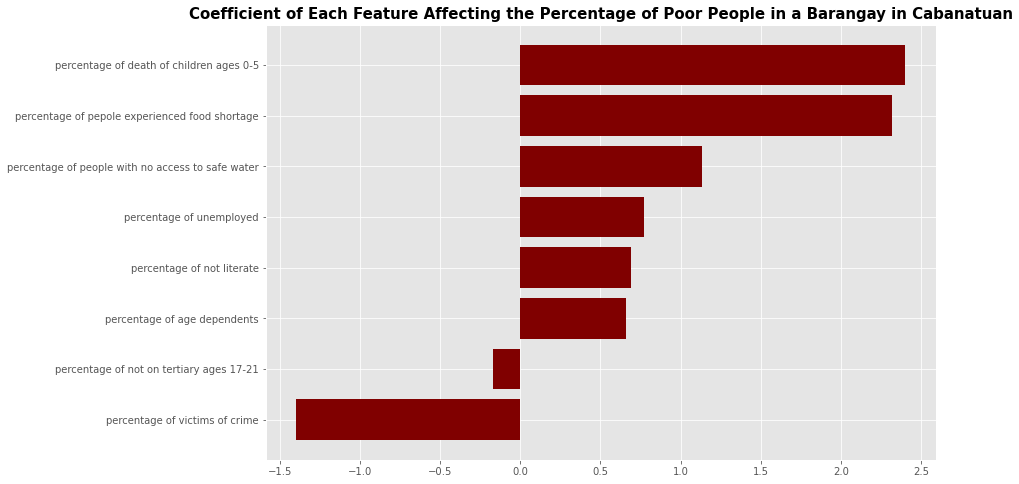

In [30]:
fig, ax = plt.subplots(figsize=(12,8))


plt.barh(plt_df['feature_columns'], coef_df['coefficient'], color='maroon')

plt.title('Coefficient of Each Feature Affecting the Percentage of Poor People in a Barangay in Cabanatuan', size=15, weight='bold')
# plt.yticks(np.arange(0, 101, step=20))
plt.show()

In [31]:
ndeath05 = 20
nntsws = 20
ntert1721 = 20
nntliter10ab = 20
nfshort = 20
nvictcr = 20
age_dep = 20
dep = 40
to_predict = [ndeath05, nntsws, ntert1721, nntliter10ab, nfshort, nvictcr, age_dep, dep]
to_predict = np.asarray(to_predict).reshape(1,-1)

In [32]:
to_predict.reshape(1,-1)

array([[20, 20, 20, 20, 20, 20, 20, 40]])

In [47]:
loaded_model.predict(to_predict)

array([92.91773442])

In [48]:
base_line = reg.predict(to_predict)


In [49]:
base_line

array([92.91773442])

## Checking for Skedasticity

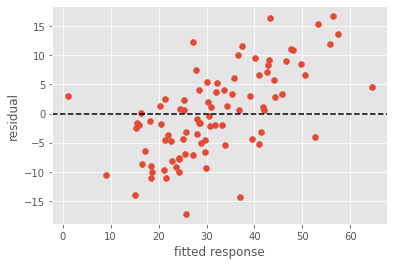

In [35]:
residuals = y  - reg.predict(X)

plt.scatter(y, residuals)
plt.axhline(0,color='k',ls='--')
plt.xlabel('fitted response')
plt.ylabel('residual')
plt.show()

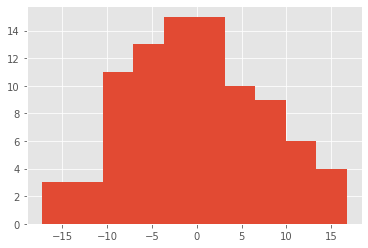

In [36]:
residuals.hist()
plt.show()

## Checking for Normality

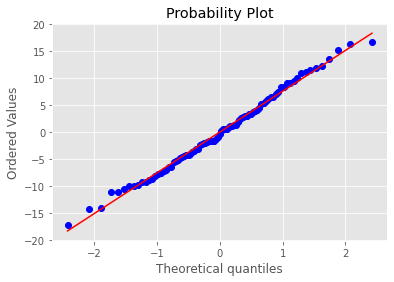

In [37]:
import scipy.stats as stats

stats.probplot(residuals, dist="norm", plot=plt)
plt.show()

## hypertuning linear reg

In [38]:
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV, train_test_split
from sklearn.feature_selection import RFE

In [39]:
X = X.to_numpy()
Y = y.to_numpy()

In [40]:
kf = KFold(n_splits=10, shuffle=False)
fold = []
train_r2 = []
test_rmse = []
test_r2 = []
i=1
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    Y_train, Y_test = Y[train_index], Y[test_index]
    print(np.shape(X_train), np.shape(Y_train))
    print(np.shape(X_test), np.shape(Y_test))

    reg = LinearRegression()
    reg.fit(X_train, Y_train)
    
    #evaluate fit of train data
    train_r2.append(reg.score(X_train, Y_train))
    print('train: R2=%0.2f '% reg.score(X_train, Y_train))
    
    test_rmse.append(RMSE(reg, X_test, Y_test))
    test_r2.append(reg.score(X_test,Y_test))
    #evaluate using test data
    print('test: RMSE=%0.2f, R2=%0.2f' % (RMSE(reg, X_test, Y_test), reg.score(X_test,Y_test)))
    fold.append(i)
    i += 1

reg_check = pd.DataFrame({'fold':fold, 'train_r2':train_r2, 'test_rmse':test_rmse, 'test_r2':test_r2
                         })

(80, 8) (80,)
(9, 8) (9,)
train: R2=0.61 
test: RMSE=8.34, R2=0.58
(80, 8) (80,)
(9, 8) (9,)
train: R2=0.63 
test: RMSE=7.13, R2=-0.42
(80, 8) (80,)
(9, 8) (9,)
train: R2=0.56 
test: RMSE=9.89, R2=0.70
(80, 8) (80,)
(9, 8) (9,)
train: R2=0.63 
test: RMSE=9.29, R2=0.02
(80, 8) (80,)
(9, 8) (9,)
train: R2=0.61 
test: RMSE=5.94, R2=0.24
(80, 8) (80,)
(9, 8) (9,)
train: R2=0.61 
test: RMSE=7.76, R2=0.48
(80, 8) (80,)
(9, 8) (9,)
train: R2=0.62 
test: RMSE=9.23, R2=0.50
(80, 8) (80,)
(9, 8) (9,)
train: R2=0.61 
test: RMSE=8.02, R2=0.56
(80, 8) (80,)
(9, 8) (9,)
train: R2=0.62 
test: RMSE=9.77, R2=0.36
(81, 8) (81,)
(8, 8) (8,)
train: R2=0.61 
test: RMSE=6.01, R2=0.48


In [41]:
reg_check.set_index('fold')

,train_r2,test_rmse,test_r2
fold,,,
1,0.605583,8.338028,0.577298
2,0.629754,7.134804,-0.420994
3,0.563547,9.891427,0.696602
4,0.633768,9.293959,0.023814
5,0.612741,5.941445,0.242519
6,0.609242,7.760142,0.480546
7,0.618282,9.228159,0.500952
8,0.609653,8.023913,0.561048
9,0.620836,9.771460,0.361626


## Oversampling

In [42]:
from imblearn.over_sampling import SMOTENC
from sklearn.datasets import make_classification

In [43]:
X, y = make_classification(n_classes=10, n_informative=8, n_redundant=1, flip_y=0,
n_features=11, n_clusters_per_class=1, n_samples=1000, random_state=10)

In [44]:
X.shape

(1000, 11)